In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from google.colab import files
import io
from boruta import BorutaPy
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score


In [2]:
!pip install Boruta

In [3]:
# uploaded = files.upload()

In [4]:
data = pd.read_csv("/content/mushrooms.csv")
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [5]:
data.shape

(8124, 23)

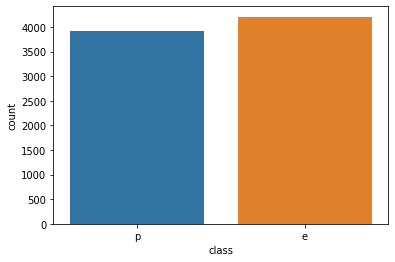

In [6]:
sns.countplot(x='class',data=data)

In [7]:
data.isnull().sum().sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [9]:
data.describe()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [10]:
def correlation(data, threshold):
  col_corr = set()
  corr_matrix = data.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]>threshold):
        col_name = corr_matrix.columns[i]
        col_corr.add(col_name)
  return col_corr

corr_features = correlation(data,0.80)
len(set(corr_features))
corr_features 

set()

In [11]:
x = data.drop('class',axis=1)

In [12]:
y = data[['class']]

In [13]:
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [14]:
y.head()

,class
0,p
1,e
2,e
3,p
4,e


In [15]:
y.value_counts()

class
e        4208
p        3916
dtype: int64

In [16]:
labl = LabelEncoder()

In [17]:
x= x.apply(labl.fit_transform)

In [18]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,2


In [19]:
y = y.apply(labl.fit_transform)

In [20]:
y

,class
0,1
1,0
2,0
3,1
4,0
...,...
8119,0
8120,0
8121,0
8122,1


In [21]:
stdscalr = StandardScaler()

In [22]:
X = stdscalr.fit_transform(x)

In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 42,stratify = y)

In [24]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5686, 22), (2438, 22), (5686, 1), (2438, 1))

In [25]:
RFC = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=1)

In [26]:
RFC.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [27]:
y_pred = RFC.predict(x_test)

In [28]:
confusion_matrix(y_test,y_pred)

array([[1263,    0],
       [  17, 1158]])

In [29]:
accuracy_score(y_test,y_pred)

0.9930270713699754

In [30]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.99      1.00      0.99      1263\n           1       1.00      0.99      0.99      1175\n\n    accuracy                           0.99      2438\n   macro avg       0.99      0.99      0.99      2438\nweighted avg       0.99      0.99      0.99      2438\n'

In [31]:
features =  BorutaPy(RFC,n_estimators = 'auto',verbose = 3,random_state = 1)

In [32]:
features.fit_transform(x_train,y_train)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	21
Tentative: 	1
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	21
Tentative: 	0
Rejected: 	1


BorutaPy finished running.

Iteration: 	10 / 100
Confirmed: 	21
Tentative: 	0
Rejected: 	1


array([[-2.08704716,  0.95327039,  1.37304929, ..., -0.67019486,
        -1.31310821, -0.29572966],
       [ 1.02971224,  0.95327039,  1.76587407, ..., -0.67019486,
        -1.31310821, -0.29572966],
       [ 1.02971224,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       ...,
       [-0.8403434 , -1.48615695,  1.37304929, ..., -0.67019486,
        -2.91054623, -0.29572966],
       [ 1.02971224, -1.48615695, -0.59107461, ..., -0.2504706 ,
         1.08304882, -0.8771691 ],
       [ 1.02971224, -1.48615695,  1.76587407, ..., -1.08991911,
         0.28432981, -0.29572966]])

In [33]:
features.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True])

In [34]:
features.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1])

In [35]:
features.n_features_

21

In [36]:
selected_features  = pd.DataFrame({"Features":list(x.columns),"Ranking":features.ranking_})
selected_features.sort_values(by="Ranking")

,Features,Ranking
0,cap-shape,1
19,spore-print-color,1
18,ring-type,1
17,ring-number,1
16,veil-color,1
14,stalk-color-below-ring,1
13,stalk-color-above-ring,1
12,stalk-surface-below-ring,1
11,stalk-surface-above-ring,1
20,population,1


In [37]:
len(selected_features)

22

In [38]:
x_importtrain = features.transform(np.array(x_train))

In [39]:
x_importtest =  features.transform(np.array(x_test))

In [40]:
random_forest_clf = RandomForestClassifier(random_state=11,n_estimators=1000,n_jobs=-1)

In [41]:
random_forest_clf.fit(x_importtrain,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)

In [42]:
f1_score(y_test,random_forest_clf.predict(x_importtest))

1.0

In [43]:
y_pred_new = random_forest_clf.predict(x_importtest)

In [44]:
accuracy_score(y_test,y_pred_new)

1.0

In [49]:
classification_report(y_test,y_pred_new)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1263\n           1       1.00      1.00      1.00      1175\n\n    accuracy                           1.00      2438\n   macro avg       1.00      1.00      1.00      2438\nweighted avg       1.00      1.00      1.00      2438\n'

In [59]:
n_estimators = [24,50,75,100]
criterion =['gini','entropy']
max_depth = [3,5,10]
parameters = {'n_estimators':n_estimators,'criterion':criterion,'max_depth':max_depth}

In [56]:
rfnew = RandomForestClassifier(random_state=1)

In [60]:
grid = GridSearchCV(estimator=rfnew,param_grid=parameters,cv=5,n_jobs=-1,verbose=3)

In [62]:
Rfc_final = grid.fit(x_importtrain,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   17.0s finished


In [63]:
Rfc_final.fit(x_importtrain,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   17.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [64]:
Rfc_final.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 24}

In [66]:
RFC_Fainal = RandomForestClassifier(n_estimators=24,criterion='gini',max_depth=10)

In [68]:
RFC_Fainal.fit(x_importtrain,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=24,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
y_pred_latest  = RFC_Fainal.predict(x_importtest)

In [75]:
accuracy_score(y_test,y_pred_latest)*100

100.0

In [72]:
classification_report(y_test,y_pred_latest)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1263\n           1       1.00      1.00      1.00      1175\n\n    accuracy                           1.00      2438\n   macro avg       1.00      1.00      1.00      2438\nweighted avg       1.00      1.00      1.00      2438\n'

In [74]:
f1_score(y_test,random_forest_clf.predict(x_importtest))*100

100.0